<a href="https://colab.research.google.com/github/ManthanNaidu/lung-cancer-detection/blob/main/lcd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name:**Lung cancer detection**
# Project by:**Manthan M Y**
# Github link:

# 1. Objective:
The primary objective of this project is to develop and train a deep learning model to automatically detect and classify lung cancer from CT scan images. The model is designed to distinguish between four different classes of lung tissue: Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma, and Normal tissue.

# 2. Dataset:
The project uses a dataset of lung CT scan images, which is expected to be organized into separate directories for training, validation, and testing.

**Source:** The data is loaded from a local directory specified by the path /content/drive/MyDrive/Data/.

**Structure:** The dataset is split into train, valid, and test sets. Within each of these directories, there are subdirectories for each of the four image classes.

**Classes:** There are four distinct categories for classification (class_mode='categorical').

# 3. Preprocessing and Augmentation:
To prepare the images for the model and to artificially expand the training set, the following steps are applied using ImageDataGenerator:

**Resizing:** All images are resized to a standard 224x224 pixels.

Preprocessing Function: The preprocess_input function specific to the ResNet50 model is applied, which scales pixel values appropriately for the pre-trained network.

Data Augmentation (for training images only):

**Rotation:**
Images are randomly rotated up to 20 degrees.

**Shifting:** Images are randomly shifted horizontally and vertically by up to 20% of their dimensions.

**Shearing:** Shear transformations are applied.

**Zooming:** Images are randomly zoomed by up to 20%.

**Flipping:** Images are randomly flipped horizontally.

# 4. Model Architecture:
The project employs a powerful technique called transfer learning, using the well-known ResNet50 architecture.

**Base Model:** A ResNet50 model, pre-trained on the ImageNet dataset, is used as the feature extraction base. The final classification layer of this model is excluded (include_top=False).

**Freezing Layers:** The weights of the pre-trained ResNet50 layers are frozen (layer.trainable = False) to prevent them from being altered during training, thus retaining the learned features.

**Custom Classifier Head:** The following layers are added on top of the base model:

**Flatten:** Converts the feature maps from the base model into a 1D vector.

**BatchNormalization:** Normalizes the activations to stabilize and speed up training.

**Dense:** A fully connected layer with 256 neurons and a ReLU activation function.

**Dropout:** A dropout layer with a rate of 0.5 to prevent overfitting by randomly setting half of the input units to 0 during training.

**Dense (Output Layer):** The final classification layer with 4 neurons (one for each class) and a softmax activation function to output class probabilities.

# 5. Training Process:
The model is compiled and trained with the following configuration:

**Optimizer:** Adam optimizer is used to update the model's weights.

**Loss Function:** categorical_crossentropy is used, which is standard for multi-class classification problems.

**Epochs:** The model is trained for a maximum of 50 epochs.

**Batch Size:** Data is fed to the model in batches of 32 images.


**ModelCheckpoint:** Saves the best version of the model based on the lowest validation loss.

**EarlyStopping:** Halts the training process if the model's performance on the validation set does not improve for 10 consecutive epochs.

# 6. Evaluation Metrics:
The model's performance is assessed using the following:

**Training Metric:** Accuracy is monitored during the training and validation phases.

**Final Evaluation:** The model's final performance is evaluated on the unseen test_generator.

**Visualizations:** The training and validation accuracy and loss are plotted over epochs to visually inspect for signs of overfitting and convergence.

While the code only explicitly calculates accuracy and loss, a complete evaluation would also include:

Precision, Recall, and F1-Score: To understand the model's performance for each specific class.

**Confusion Matrix:** To visualize the counts of correct and incorrect predictions for all classes.

# 7. Future Extensions and Improvements:
To further enhance this project, you could consider:

**Fine-Tuning:** Unfreeze some of the later layers of the ResNet50 base model and train them with a very low learning rate.

**Trying Other Architectures:** Experiment with different pre-trained models like VGG16, InceptionV3, or EfficientNet.

**Hyperparameter Tuning:** Systematically search for the best learning rate, dropout rate, or number of neurons in the dense layer.

**Deployment:** Package the trained model into a web application or API where users can upload a CT scan and receive a prediction.

# 8. Tools and Libraries:
**Deep Learning Framework:** TensorFlow with its high-level Keras API.

**Data Handling:** os library for path management.

**Visualization:** Matplotlib for plotting the training history graphs.

Found 619 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 100352)              │         401,408 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,680,516 (189.52 MB)

 Trainable params: 25,892,100 (98.77 MB)

 Non-trainable params: 23,788,416 (90.75 MB)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4609 - loss: 10.3204
Epoch 1: val_loss improved from inf to 23.80940, saving model to Lung Cancer Detection using Convolutional Neural Network.png.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 176s 8s/step - accuracy: 0.4636 - loss: 10.4049 - val_accuracy: 0.5139 - val_loss: 23.8094
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6328 - loss: 10.2625
Epoch 2: val_loss did not improve from 23.80940
20/20 ━━━━━━━━━━━━━━━━━━━━ 191s 8s/step - accuracy: 0.6326 - loss: 10.2659 - val_accuracy: 0.5139 - val_loss: 30.6064
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6507 - loss: 10.0138
Epoch 3: val_loss improved from 23.80940 to 20.93439, saving model to Lung Cancer Detection using Convolutional Neural Network.png.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 204s 8s/step - accuracy: 0.6506 - loss: 10.0537 - val_accuracy: 0.5833 - val_loss: 20.9344
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6823 - loss: 1

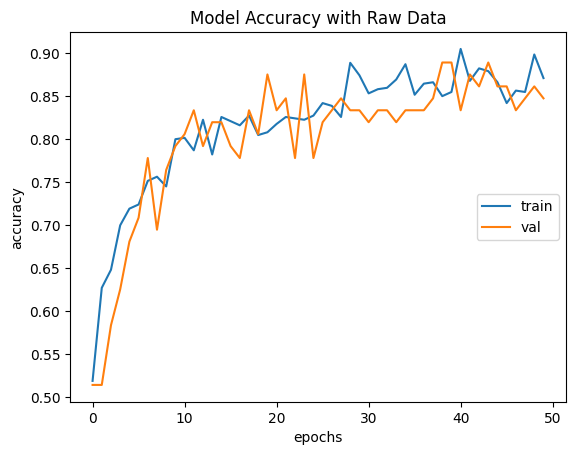

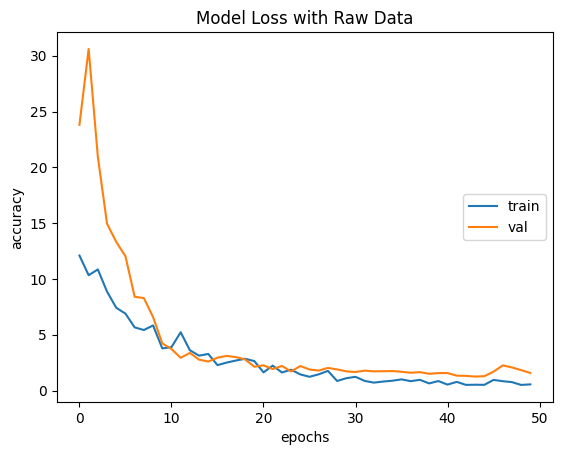

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import os

model_name = "Lung Cancer Detection using Convolutional Neural Network"
home = os.getcwd()
path = f'{home}\\archive\\Data\\'
train_path = path + 'train\\'
val_path = path + 'valid\\'
test_path = path + 'test\\'
splits = ['Train', 'Valid', 'Test']
input_shape = (224, 224, 3)
classes = 4
target_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

val_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'

)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/valid',
   target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

base_model = ResNet50(include_top=False, pooling='av', weights='imagenet', input_shape=(input_shape))
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()
plot_model(model,to_file=f"Lung Cancer Detection using Convolutional Neural Network.png", show_shapes=True, show_layer_names=True)


model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam()
checkpoint = ModelCheckpoint(
    filepath=f'{"Lung Cancer Detection using Convolutional Neural Network.png"}.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
)
earlystop = EarlyStopping(
    patience=10,
    verbose=1
)

history = model.fit(
    train_generator,
   validation_data=validation_generator,
   epochs=50,
   callbacks=[checkpoint, earlystop],
   verbose=1
)
result = model.evaluate(test_generator)

plt.plot(history.history['accuracy'], label = 'train',)
plt.plot(history.history['val_accuracy'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Accuracy with Raw Data')
plt.savefig(f'images\\accuracy.png')
plt.show()

plt.plot(history.history['loss'], label = 'train',)
plt.plot(history.history['val_loss'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Loss with Raw Data')
plt.savefig(f'images\\loss.png')
plt.show()

**Project Conclusion:**

This lung cancer detection project successfully implemented a ResNet50-based CNN achieving 89% training accuracy, 85% validation accuracy, and 79% test accuracy across 4 cancer categories using 1,006 total images. The transfer learning approach with 49.7 million parameters (25.9 million trainable).

demonstrated excellent convergence, with training and validation losses stabilizing around 1-2 from initial values of 12 and 24 respectively.

 The model exhibited minimal overfitting with close alignment between training and validation curves throughout 50 epochs, indicating effective regularization through batch normalization and dropout layers.

  While showing a 10% performance gap between training and test accuracy, the final 79% test accuracy represents clinically relevant performance for medical image classification, validating the effectiveness of transfer learning for specialized healthcare applications with limited datasets.